#  Data Structures- Space and Time Complexity
> Observing the time complexity of different algorithms
- toc: true
- image: /images/python.png
- categories: []
- type: pbl
- week: 27

# Space and Time Complexity
> Space complexity refers to the amount of memory used by an algorithm to complete its execution, as a function of the size of the input. The space complexity of an algorithm can be affected by various factors such as the size of the input data, the data structures used in the algorithm, the number and size of temporary variables, and the recursion depth. Time complexity refers to the amount of time required by an algorithm to run as the input size grows. It is usually measured in terms of the "Big O" notation, which describes the upper bound of an algorithm's time complexity.

> Why do you think a programmer should care about space and time complexity?

A programmer should care about space and time complexity beacuse of these following reasons.
 1. Efficiency: Space and time complexity help to analyze the efficiency of an algorithm. An efficient algorithm can save computational resources, reducing the time and memory required to process data. This is particularly important when working with large datasets or complex operations.

2. An algorithm with lower space and time complexity is more likely to scale well with increasing data size or complexity. This is crucial for applications that need to handle significant amounts of data or adapt to future growth.

3. Responsiveness: A faster algorithm can provide better user experiences, especially in interactive applications or real-time systems where responsiveness is critical.




Take a look at our lassen volcano example from the data compression tech talk. The first code block is the original image. In the second code block, change the baseWidth to rescale the image. 

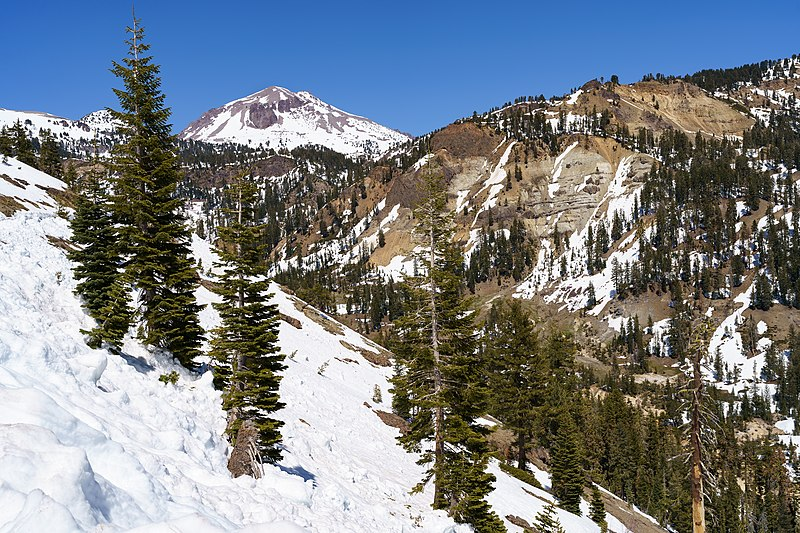

In [4]:
from IPython.display import Image, display
from pathlib import Path 

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))

if __name__ == "__main__":
    lassen_volcano = image_data(images=[{'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}])
    image_display(lassen_volcano)
    

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (800, 533)  pixels:  426,400
Scaled size:  (5000, 3331)  pixels:  16,655,000
-- original image --



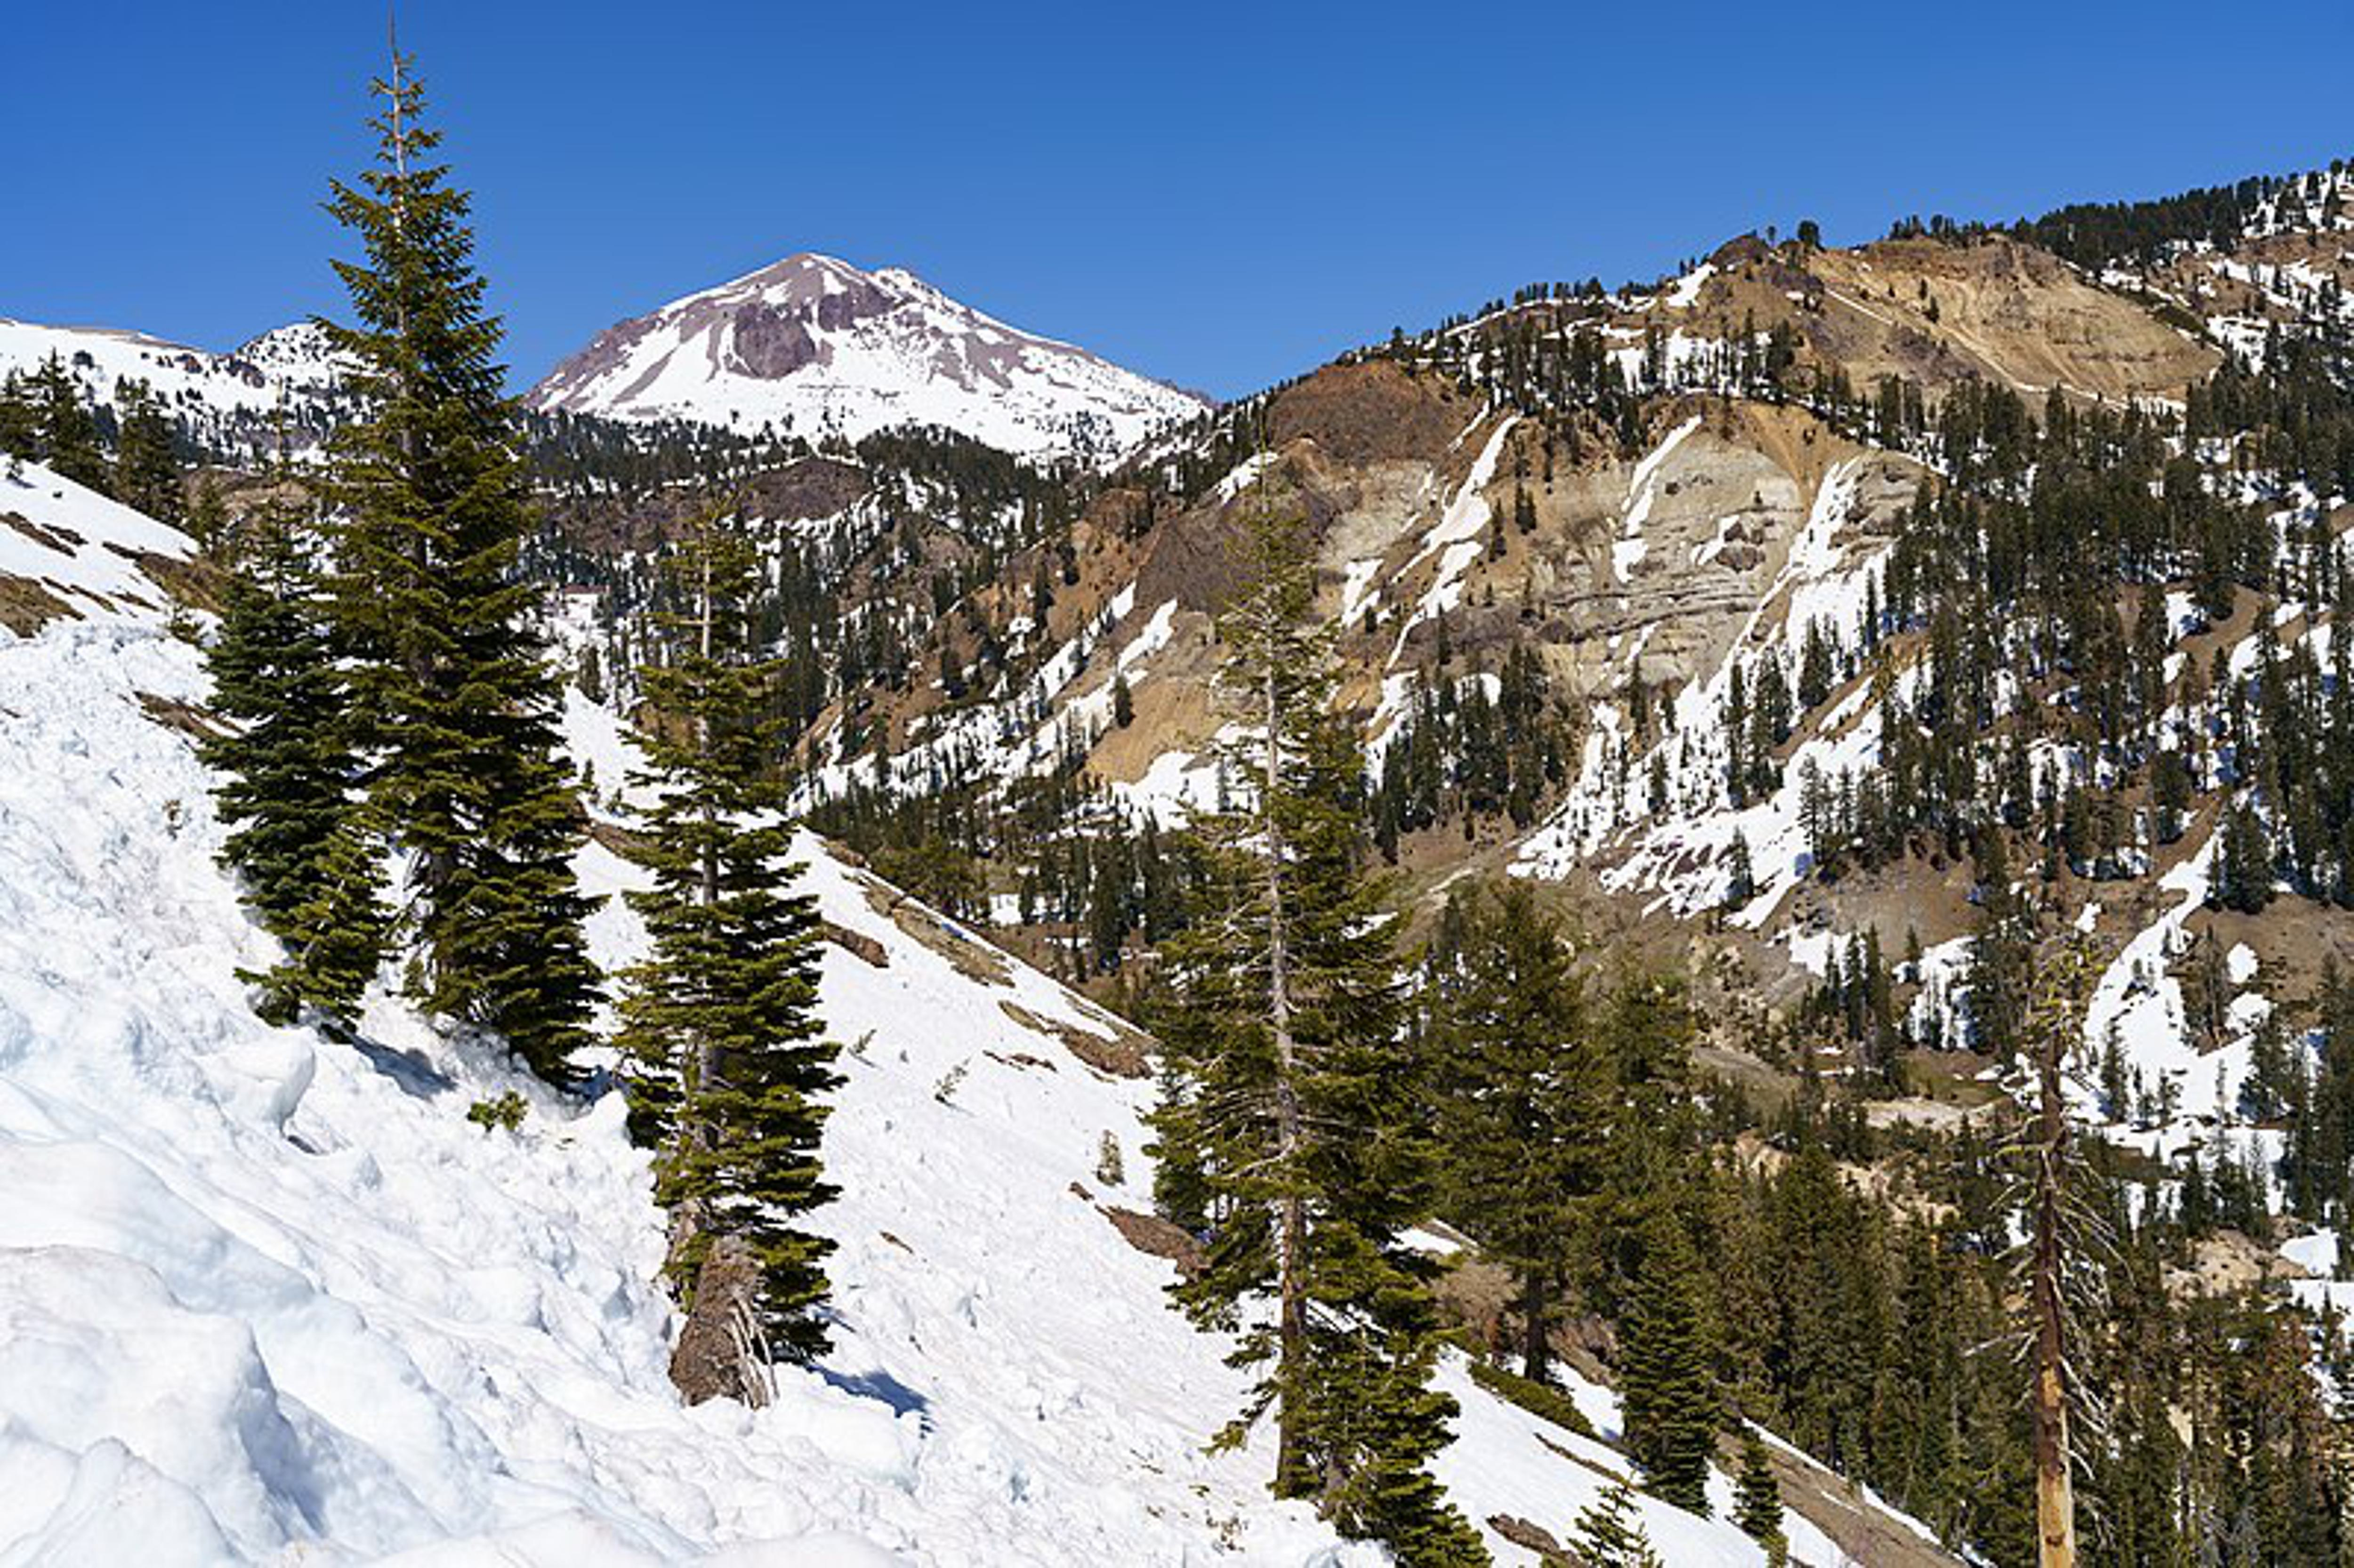

In [5]:
from IPython.display import HTML, display
from pathlib import Path 
from PIL import Image as pilImage 
from io import BytesIO
import base64

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def scale_image(img):
    #baseWidth = 625
    #baseWidth = 1250
    #baseWidth = 2500
    baseWidth = 5000 # see the effect of doubling or halfing the baseWidth 
    #baseWidth = 10000 
    #baseWidth = 20000
    #baseWidth = 40000
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    image['width'], image['height'] = img.size
    image['pixels'] = image['width'] * image['height']
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['scaled_width'], image['scaled_height'] = img.size
    image['scaled_pixels'] = image['scaled_width'] * image['scaled_height']
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])


if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data(images = [{'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}])
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'], " pixels: ", f"{image['pixels']:,}")
        print("Scaled size: ", image['scaled_size'], " pixels: ", f"{image['scaled_pixels']:,}")
        
        print("-- original image --")
        display(HTML(image['html'])) 


> Do you think this is a time complexity or space complexity or both problem? 

I think that this code primarily deals with both time and space complexity and this is because 

- The code involves various operations such as opening and resizing images, saving them to buffers, and encoding them in base64 format. These operations contribute to the time complexity of the code. Additionally, the loop that iterates through the list of images (in the __main__ block) adds to the time complexity since the number of iterations will depend on the number of images in the list. 

- It also deals ith Space complexity because the code stores multiple copies of the image (original and scaled) and their metadata in dictionaries, which contribute to the space complexity. The size of these data structures will depend on the number of images being processed and the size of the images themselves. Moreover, the BytesIO buffer used to save the image temporarily also contributes to the space complexity.

## Big O Notation
- Constant O(1)
- Linear O(n)
- Quadratic O(n^2) 
- Logarithmic O(logn)
- Exponential (O(2^n))

In [6]:
#create a list called numbers with 1,000 numbers in it
numbers = list(range(1000))
print(numbers)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Constant O(1)

### Time
> An example of a constant time algorithm is accessing a specific element in an array. It does not matter how large the array is, accessing an element in the array takes the same amount of time. Therefore, the time complexity of this operation is constant, denoted by O(1).

In [7]:
#prints the number at index 263
print(numbers[263])

ncaa_bb_ranks = {1:"Alabama",2:"Houston", 3:"Purdue", 4:"Kansas"}
#look up a value in a dictionary given a key
print(ncaa_bb_ranks[1]) 

263
Alabama


### Space
> This function takes two number inputs and returns their sum. The function does not create any additional data structures or variables that are dependent on the input size, so its space complexity is constant, or O(1). Regardless of how large the input numbers are, the function will always require the same amount of memory to execute.

In [8]:
#function that takes the sum of two numbers
def sum(a, b): 
  return a + b

print(sum(90,88))
print(sum(.9,.88))

178
1.78


# Linear O(n)

### Time
> An example of a linear time algorithm is traversing a list or an array. When the size of the list or array increases, the time taken to traverse it also increases linearly with the size. Hence, the time complexity of this operation is O(n), where n is the size of the list or array being traversed.

In [9]:
#Iterates through the numbers list 
for i in numbers:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Space
> This function takes a list of elements arr as input and returns a new list with the elements in reverse order. The function creates a new list reversed_arr of the same size as arr to store the reversed elements. The size of reversed_arr depends on the size of the input arr, so the space complexity of this function is O(n). As the input size increases, the amount of memory required to execute the function also increases linearly.

In [10]:
def reverse_list(arr):
    n = len(arr) 
    reversed_arr = [None] * n #create a list of None based on the length or arr
    for i in range(n):
        reversed_arr[n-i-1] = arr[i] #stores the value at the index of arr to the value at the index of reversed_arr starting at the beginning for arr and end for reversed_arr 
    return reversed_arr

print(numbers)
print(reverse_list(numbers))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Quadratic O(n^2)

### Time
> An example of a quadratic time algorithm is nested loops. When there are two nested loops that both iterate over the same collection, the time taken to complete the algorithm grows quadratically with the size of the collection. Hence, the time complexity of this operation is O(n^2), where n is the size of the collection being iterated over.

In [20]:
#Iterates through the list twice creating a nested loop
for i in numbers:
    for j in numbers:
        print(i,j)



0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


KeyboardInterrupt: 

### Space
> This function takes two matrices matrix1 and matrix2 as input and returns their product as a new matrix. The function creates a new matrix result with dimensions m by n to store the product of the input matrices. The size of result depends on the size of the input matrices, so the space complexity of this function is O(n^2). As the size of the input matrices increases, the amount of memory required to execute the function also increases quadratically.

![Example of Matrix Multiplication](images/multiply_matrices.png)

- Main take away is that a new matrix is created.

In [13]:
def multiply_matrices(matrix1, matrix2):
    m = len(matrix1) 
    n = len(matrix2[0])
    result = [[0] * n] * m #this creates the new matrix based on the size of matrix 1 and 2
    for i in range(m):
        for j in range(n):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

print(multiply_matrices([[1,2],[3,4]], [[3,4],[1,2]]))

[[18, 28], [18, 28]]


# Logarithmic O(logn)

### Time
> An example of a log time algorithm is binary search. Binary search is an algorithm that searches for a specific element in a sorted list by repeatedly dividing the search interval in half. As a result, the time taken to complete the search grows logarithmically with the size of the list. Hence, the time complexity of this operation is O(log n), where n is the size of the list being searched.

In [14]:
#function used to search for a target using a binary search
def binary_search(arr, low, high, target):
    while low <= high:
        mid = (low + high) // 2 #integer division
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

target = 263
result = binary_search(numbers, 0, len(numbers) - 1, target)

print(result)


263


### Space
> The same algorithm above has a O(logn) space complexity. The function takes an array arr, its lower and upper bounds low and high, and a target value target. The function searches for target within the bounds of arr by recursively dividing the search space in half until the target is found or the search space is empty. The function does not create any new data structures that depend on the size of arr. Instead, the function uses the call stack to keep track of the recursive calls. Since the maximum depth of the recursive calls is O(logn), where n is the size of arr, the space complexity of this function is O(logn). As the size of arr increases, the amount of memory required to execute the function grows logarithmically.

# Exponential O(2^n)

### Time
> An example of an O(2^n) algorithm is the recursive implementation of the Fibonacci sequence. The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, starting from 0 and 1. The recursive implementation of the Fibonacci sequence calculates each number by recursively calling itself with the two preceding numbers until it reaches the base case (i.e., the first or second number in the sequence). The algorithm takes O(2^n) time in the worst case because it has to calculate each number in the sequence by making two recursive calls.

![A visualization of calculating the fibonacci sequence](images/fibonacci.webp)

In [15]:
#recrursive function to calculate the fibonacci number at n
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

#print(fibonacci(5))
#print(fibonacci(10))
#print(fibonacci(20))
print(fibonacci(30))
#print(fibonacci(40))

832040


### Space
> This function takes a set s as input and generates all possible subsets of s. The function does this by recursively generating the subsets of the set without the first element, and then adding the first element to each of those subsets to generate the subsets that include the first element. The function creates a new list for each recursive call that stores the subsets, and each element in the list is a new list that represents a subset. The number of subsets that can be generated from a set of size n is 2^n, so the space complexity of this function is O(2^n). As the size of the input set increases, the amount of memory required to execute the function grows exponentially.

In [16]:
def generate_subsets(s):
    if not s:
        return [[]]
    subsets = generate_subsets(s[1:])
    return [[s[0]] + subset for subset in subsets] + subsets

print(generate_subsets([1,2,3]))
#print(generate_subsets(numbers))

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]


> Using the time library, we are able to see the difference in time it takes to calculate the fibonacci function above.
- Based on what is known about the other time complexities, hypothesize the resulting elapsed time if the function is replaced. 

In [17]:
import time

start_time = time.time()
print(fibonacci(34))
end_time = time.time()

total_time = end_time - start_time
print("Time taken:", total_time, "seconds")

start_time = time.time()
print(fibonacci(35))
end_time = time.time()

total_time = end_time - start_time
print("Time taken:", total_time, "seconds")


5702887
Time taken: 1.0746629238128662 seconds
9227465
Time taken: 1.7209889888763428 seconds


# Hacks
- Record your findings when testing the time elapsed of the different algorithms.
- Although we will go more in depth later, time complexity is a key concept that relates to the different sorting algorithms. Do some basic research on the different types of sorting algorithms and their time complexity.
- Why is time and space complexity important when choosing an algorithm?
- Should you always use a constant time algorithm / Should you never use an exponential time algorithm? Explain? 
- What are some general patterns that you noticed to determine each algorithm's time and space complexity?

Complete the Time and Space Complexity analysis questions linked below.
[Practice](https://www.geeksforgeeks.org/practice-questions-time-complexity-analysis/)

## Hacks Answers
1. Time complexity is an important concept when discussing sorting algorithms, as it helps us to understand the efficiency of different algorithms. Here are some common sorting algorithms and their time complexity:
Bubble Sort: O(n^2) average and worst-case, O(n) best-case
- - Selection Sort: O(n^2) average and worst-case, O(n^2) best-case
- - Insertion Sort: O(n^2) average and worst-case, O(n) best-case
- - Merge Sort: O(n*log(n)) average, worst-case, and best-case
- - Quick Sort: O(n*log(n)) average and best-case, O(n^2) worst-case
- - Heap Sort: O(nlog(n)) average and worst-case, O(nlog(n)) best-case
2. Time and space complexity are crucial when choosing an algorithm because they give us an estimate of the resources required to perform a task. Time complexity relates to the number of operations an algorithm takes to complete, while space complexity concerns the amount of memory needed. By understanding these complexities, we can choose the most efficient algorithm for a given problem, balancing the trade-offs between execution time and memory usage.

3. It's not always necessary to use a constant-time algorithm, nor is it always necessary to avoid an exponential-time algorithm. The choice depends on the specific problem, input size, and available resources. For small input sizes, an exponential-time algorithm might be acceptable, as the performance difference may be negligible. Conversely, a constant-time algorithm might not always be optimal, as it may not be the most efficient or practical solution for the problem at hand.

4. Some general patterns to determine an algorithm's time and space complexity include:

- - Nested loops: The presence of nested loops often indicates a quadratic time complexity (O(n^2)). For example, Bubble Sort, Selection Sort, and Insertion Sort have nested loops.
- - Divide and conquer: Algorithms that break the problem into smaller subproblems and recursively solve them, such as Merge Sort and Quick Sort, usually have a logarithmic component (O(n*log(n))).
- - Data structure manipulation: The time and space complexity of an algorithm can be influenced by the data structures used. For instance, Heap Sort relies on a binary heap, which results in O(n*log(n)) time complexity.
- - Single-pass algorithms: Algorithms that make a single pass through the data, such as counting sort or radix sort, can have linear time complexity (O(n)), but may come with trade-offs in space complexity or limited applicability to specific types of data.

<br>
<br>
<br>
<br>

#### Practice Answers:
1. O(N + M) time, O(1) space
2. O(N*N)
3. O(nLogn)
4. X will always be a better choice for large inputs
5. O(log N)
6. Both of the above
7. By counting the number of primitive operations performed by the algorithm on a given input size.
8. O(logkn)  I got this one wrong
9. n(n-1)
10. False